<a href="https://colab.research.google.com/github/sarabartl/countryembeddings/blob/main/CountryEmbeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictors of Size in Word Embeddings of Countries

#### What are the predictors of country size in a word embedding space?

<br>

### Outline of Colab Notebook

1. Load Libraries and Word Embeddings
2. Define the Spectrum Vectors for Size (big-small and large-small)
3. Get Country Data
4. Calculate
5. Get External Data (surface area, population, GDP)
6. Export Data


### Some Background

The idea here is to compare the 'size' of countries in the word embedding space to external measures for different 'kinds' of size: surface area, population and GDP (economic size).

<br>

We can get at the relative size of countries (e.g. size of a country in relation to other countries) through projecting countries onto a vector that represents size. Essentially, we first draw a line between two antonyms that capture size: big and small. We then 'project' countries onto that line, basically drawing another line from each country vector onto the size vector so that they intersect at 90 degrees.

<br>

This image from another study (Grand et al. 2022) using vector projection illustrates this well:
They too have a spectrum vector for size (the red line) but instead of countries, they project animals.
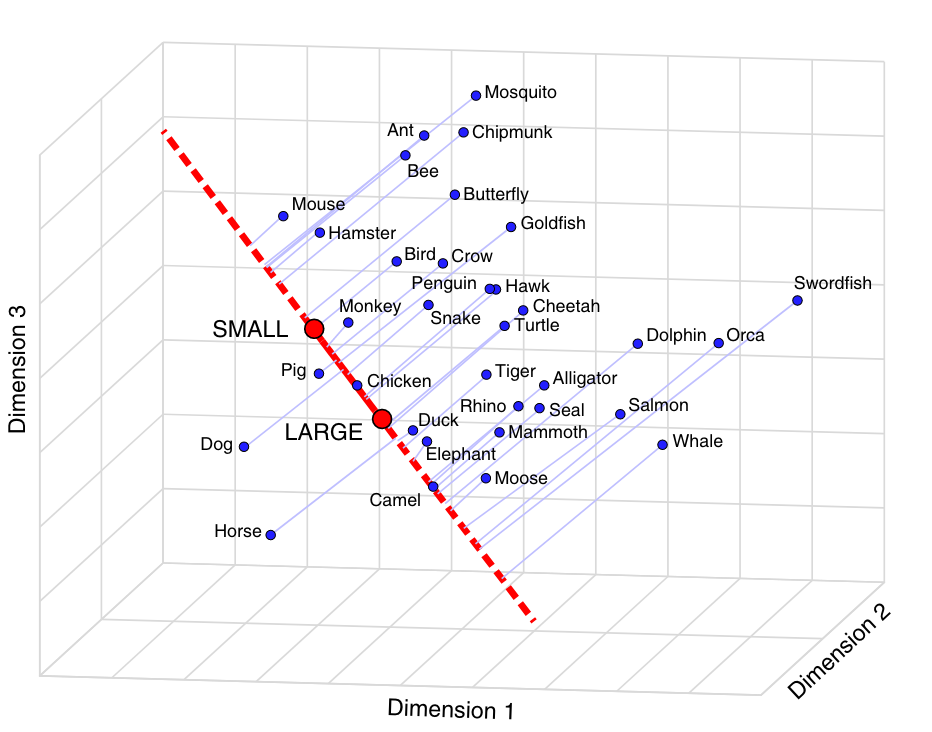

# 1. Load Libraries and Word Embeddings

Load Libraries and get GloVe Embeddings

In [ ]:
import gensim
import numpy
import re
import string

In [ ]:
from numpy import linalg
import pandas as pd

In [ ]:
!wget 'https://nlp.stanford.edu/data/glove.42B.300d.zip'

--2023-05-25 08:18:15--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2023-05-25 08:18:15--  https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]
Saving to: ‘glove.42B.300d.zip.1’

glove.42B.300d.zip. 100%[===================>]   1.75G  4.99MB/s    in 5m 53s  

2023-05-25 08:24:08 (5.08 MB/s) - ‘glove.42B.300d.zip.1’ saved [1877800501/1877800501]



In [ ]:
!unzip glove.42B.300d.zip


Archive:  glove.42B.300d.zip
replace glove.42B.300d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input = 'glove.42B.300d.txt'
word2vec_output = 'word2vec.txt'
glove2word2vec(glove_input, word2vec_output)

<ipython-input-10-8d0b235522c4>:4: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input, word2vec_output)


(1917494, 300)

In [ ]:
from gensim.models import KeyedVectors
glove = KeyedVectors.load_word2vec_format(word2vec_output, binary = False)

# 2. Define the Spectrum Vector for Size


First, we define a 'spectrum vectors' that is used to represent the feature of 'size'. We do this by essentially drawing a line between antonyms on either end of the size spectrum. This spectrum vector could be constructed in various ways, picking different near synonyms on either end. Here, we construct the size spectrum after Grand et al. (2022). <br>
The 'big' pole is defined by the words 'large', 'big' and 'huge'; the 'small' pole is defined by the words 'small', 'little' and 'tiny'. The spectrum vector is the average of the 3x3=9 pairwise lines between the antonyms (e.g. connecting each word once with each of the three at the other end of the spectrum and then averaging the 9 vectors).

In [ ]:
grand_size = ((glove["large"] - glove["small"]) + (glove["large"]-glove['little']) + (glove["large"]-glove['tiny']) + (glove['big']-glove['small']) + (glove['big']-glove['little']) + (glove['big']-glove['tiny']) + (glove['huge']-glove['small']) + (glove['huge']-glove['little']) + (glove['huge'] - glove['tiny'])) / 9

2.2 Explore Nearest Neighbours of Pole Words

In [ ]:
#define a method that lists the n closest words of a word

In [ ]:
glove.most_similar('large')

In [ ]:
glove.most_similar('tiny')

In [ ]:
glove.most_similar('small')

In [ ]:
glove.most_similar('big')

# 3. Get Country Data

Before we can project the countries onto these vectors to gauge their relative size in the embedding space, we need to get a list of countries. The list I am using here is from https://www.britannica.com/topic/list-of-countries-1993160.
Note: This list is incomplete because of the way these embeddings are encoded. With GloVe embeddings, we get one embedding per type and cannot obtain embeddings for multi-word expressions. Therefore, country names like "United Kingdom" or "East Timor" don't exist as embeddings. Multi-token countries were reduced to one word where this was meaningfully possible (e.g. Bosnia Herzegovina --> Bosnia). However, there are instances where neither of the constituent parts are associated exclusively enough with the country (e.g. Central African Republic). In these cases, the countries were excluded.

In [ ]:
import unicodedata

In [ ]:
countries = "Afghanistan Albania Algeria Andorra Angola Antigua Argentina Armenia Australia Austria Azerbaijan Bahamas Bahrain Bangladesh Barbados Belarus Belgium Belize Benin Bhutan Bolivia Bosnia Botswana Brazil Brunei Bulgaria Burkina Burundi Cambodia Cameroon Canada Chad Chile China Colombia Comoros Congo Croatia Cuba Cyprus Czech Denmark Djibouti Dominica Dominican Timor Ecuador Egypt Salvador Eritrea Estonia Ethiopia Fiji Finland France Gabon Gambia Georgia Germany Ghana Greece Grenada Guatemala Guyana Haiti Honduras Hungary Iceland India Indonesia Iran Iraq Ireland Israel Italy Jamaica Japan Jordan Kazakhstan Kenya Kiribati Kosovo Kuwait Kyrgyzstan Laos Latvia Lebanon Lesotho Liberia Libya Liechtenstein Lithuania Luxembourg Madagascar Malawi Malaysia Maldives Mali Malta Mauritania Mauritius Mexico Micronesia Moldova Monaco Mongolia Montenegro Morocco Mozambique Myanmar Namibia Nauru Nepal Netherlands Zealand Nicaragua Niger Nigeria Macedonia Norway Oman Pakistan Palau Panama Paraguay Peru Philippines Poland Portugal Qatar Romania Russia Rwanda Samoa Marino Arabia Senegal Serbia Seychelles Singapore Slovakia Slovenia Somalia Spain Sudan Suriname Sweden Switzerland Syria Taiwan Tajikistan Tanzania Thailand Togo Tonga Tunisia Turkey Turkmenistan Tuvalu Uganda Ukraine Britain Uruguay Uzbekistan Vanuatu Vatican Venezuela Vietnam Yemen Zambia Zimbabwe"

In [ ]:
countries = countries.lower()
print(countries)

afghanistan albania algeria andorra angola antigua argentina armenia australia austria azerbaijan bahamas bahrain bangladesh barbados belarus belgium belize benin bhutan bolivia bosnia botswana brazil brunei bulgaria burkina burundi cambodia cameroon canada chad chile china colombia comoros congo croatia cuba cyprus czech denmark djibouti dominica dominican timor ecuador egypt salvador eritrea estonia ethiopia fiji finland france gabon gambia georgia germany ghana greece grenada guatemala guyana haiti honduras hungary iceland india indonesia iran iraq ireland israel italy jamaica japan jordan kazakhstan kenya kiribati kosovo kuwait kyrgyzstan laos latvia lebanon lesotho liberia libya liechtenstein lithuania luxembourg madagascar malawi malaysia maldives mali malta mauritania mauritius mexico micronesia moldova monaco mongolia montenegro morocco mozambique myanmar namibia nauru nepal netherlands zealand nicaragua niger nigeria macedonia norway oman pakistan palau panama paraguay peru ph

In [ ]:
countries = unicodedata.normalize("NFKD", countries)
countries = (countries.split(' '))
print(countries)


['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia', 'botswana', 'brazil', 'brunei', 'bulgaria', 'burkina', 'burundi', 'cambodia', 'cameroon', 'canada', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo', 'croatia', 'cuba', 'cyprus', 'czech', 'denmark', 'djibouti', 'dominica', 'dominican', 'timor', 'ecuador', 'egypt', 'salvador', 'eritrea', 'estonia', 'ethiopia', 'fiji', 'finland', 'france', 'gabon', 'gambia', 'georgia', 'germany', 'ghana', 'greece', 'grenada', 'guatemala', 'guyana', 'haiti', 'honduras', 'hungary', 'iceland', 'india', 'indonesia', 'iran', 'iraq', 'ireland', 'israel', 'italy', 'jamaica', 'japan', 'jordan', 'kazakhstan', 'kenya', 'kiribati', 'kosovo', 'kuwait', 'kyrgyzstan', 'laos', 'latvia', 'lebanon', 'lesotho', 'liberia', 'libya', 'liechtenstein', 'lithuania', 'luxem

# 4. Calculate Country Projections
Get the projection for each country onto the spectrum vector. This is done by calculating the dot product between each country vector and the spectrum vector for size.

##### Grand Size


In [ ]:
dp_grand_size = []
for i in countries:
  dotproduct = numpy.dot(glove[i], grand_size)
  dp_grand_size.append(dotproduct)
print(dp_grand_size)
df_grand_size = pd.DataFrame(list(zip(countries, dp_grand_size)),
                             columns = ['countries', 'projections'])

[-0.36889032, -1.9147036, 0.11620711, -2.2190924, 0.30589667, -1.2039444, 0.9374829, -2.1035528, 1.1429112, 0.5413938, -0.54190654, -0.73209685, 0.4351974, -0.11087444, -0.98225874, -2.4603934, 0.5738819, -0.19905527, 0.91173923, -1.0593375, -0.13834651, -0.35251066, 0.72951615, 3.5224087, 1.7547475, 0.4744343, -1.4874896, -0.7652231, -2.3405983, -0.31841257, 0.9198964, 0.9686187, 0.8693132, 1.5244639, 0.30029625, -0.9501585, 0.13105425, -0.04446368, 0.7219493, 0.7615109, -1.2642843, -0.89765227, -3.2431288, -1.0598707, -1.1123933, -2.8320158, -0.43928736, 2.079624, -0.35617802, -3.1794758, -2.5411258, -0.7876372, 0.36105016, -0.6857269, 0.36437175, 1.6938862, -0.33546823, -0.058063347, 2.0101762, 1.4725202, 1.6009144, 0.17127992, -0.78180104, 1.0190753, 0.6836078, -1.2528751, 0.46752703, 1.6717403, 2.1066873, 2.6213179, 1.7789266, 1.2020661, 1.1288925, 1.3435049, -0.5290878, 0.51224756, 1.9865162, 1.231961, -0.480146, 1.0917296, -4.7018046, -1.9854262, 0.41704565, -2.1448517, -2.78061

Now we can join the dfs

In [ ]:
print(df_grand_size)

       countries  projections
0    afghanistan    -0.368890
1        albania    -1.914704
2        algeria     0.116207
3        andorra    -2.219092
4         angola     0.305897
..           ...          ...
166    venezuela     1.211629
167      vietnam     0.425208
168        yemen    -1.751686
169       zambia    -0.206611
170     zimbabwe     0.898634

[171 rows x 2 columns]


Now we have the projection 'score' (the dot product) for each country onto both spectrum vectors (big-small and large_small and the size spectrum as defined in Grand et al. ). The more negative the score, the closer the country is towards the small end of the spectrum vector. The more positive, the closer the country is towards the big/large end of the spectrum vector.

# 5. Obtain External Data


1. get population ✅
2. get contry surface area ✅
3. get gdp ✅


Load libraries

In [ ]:
import requests
import json
from bs4 import BeautifulSoup

#### Surface area

In [ ]:
url = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_area"
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
tables = soup.find_all('table')
table = tables[1]


In [ ]:
print(str(table)[:250])

<table class="wikitable sortable" style="text-align: right">
<tbody><tr>
<th>Rank</th>
<th>Country / Dependency</th>
<th>Total<br/>in km<sup>2</sup> (mi<sup>2</sup>)</th>
<th>Land<br/>in km<sup>2</sup> (mi<sup>2</sup>)</th>
<th style="width:7.5em">Wa


In [ ]:
area_df = pd.read_html(str(table), header = 0, flavor = 'html5lib') [0]
print(area_df.head(10).to_string())


              Rank Country / Dependency         Total in km2 (mi2)         Land in km2 (mi2)         Water in km2 (mi2) % water        Notes
0                –                World  510,072,000 (196,940,000)  148,940,000 (57,510,000)  361,132,000 (139,434,000)    70.8          NaN
1                1               Russia     17,098,246 (6,601,670)    16,378,410 (6,323,740)          719,836 (277,930)     4.2     [Note 2]
2                –           Antarctica     14,200,000 (5,500,000)    14,200,000 (5,500,000)                      0 (0)       0     [Note 3]
3                2               Canada      9,984,670 (3,855,100)     9,093,507 (3,511,023)          891,163 (344,080)     8.9     [Note 4]
4  3 or 4 [Note 5]                China      9,596,961 (3,705,407)     9,326,410 (3,600,950)          270,550 (104,460)     2.8  [Note 6][7]
5  3 or 4 [Note 5]        United States      9,833,517 (3,796,742)     9,147,593 (3,531,905)          685,924 (264,837)     7.0     [Note 7]
6            

Omit unnecesarry columns
(Quick note on countries included at this point: scrap what I said above about finding workarounds for mulit-word countries. I am now thinking it maybe best to just omit them, seeing as otherwise the joining of the data is a lot less straightforward, and as we can see further down, we only lose about 15 countries to this out of 160, so I think it will be fine excluding them acros the board).

In [ ]:
area_df = area_df[['Country / Dependency', 'Total in km2 (mi2)']]
area = area_df.rename(columns={'Country / Dependency':"countries", 'Total in km2 (mi2)' : "area"})
print(area)

                                   countries                       area
0                                      World  510,072,000 (196,940,000)
1                                     Russia     17,098,246 (6,601,670)
2                                 Antarctica     14,200,000 (5,500,000)
3                                     Canada      9,984,670 (3,855,100)
4                                      China      9,596,961 (3,705,407)
..                                       ...                        ...
260  Ashmore and Cartier Islands (Australia)                    5 (1.9)
261               Spratly Islands (disputed)                < 5 (< 1.9)
262            Coral Sea Islands (Australia)                < 3 (< 1.2)
263                                   Monaco                 2.0 (0.77)
264                             Vatican City                0.49 (0.19)

[265 rows x 2 columns]


Check the data type of both columns

In [ ]:
area.dtypes

countries    object
area         object
dtype: object

Change countries to lowercase for joining the data frames

In [ ]:
area['countries'] = area['countries'].apply(str.lower)
print(area)

                                   countries                       area
0                                      world  510,072,000 (196,940,000)
1                                     russia     17,098,246 (6,601,670)
2                                 antarctica     14,200,000 (5,500,000)
3                                     canada      9,984,670 (3,855,100)
4                                      china      9,596,961 (3,705,407)
..                                       ...                        ...
260  ashmore and cartier islands (australia)                    5 (1.9)
261               spratly islands (disputed)                < 5 (< 1.9)
262            coral sea islands (australia)                < 3 (< 1.2)
263                                   monaco                 2.0 (0.77)
264                             vatican city                0.49 (0.19)

[265 rows x 2 columns]


Delete square miles from area column

In [ ]:
area['area'] = area['area'].str.split('(').str[0]


Delete commas in square km numbers

In [ ]:
area['area'] = area['area'].str.replace(',', '')

Join area data to dp data

In [ ]:
data = pd.merge(df_grand_size, area, on = 'countries', how = 'inner')

In [ ]:
print(data)

       countries  projections      area
0    afghanistan    -0.368890   652867 
1        albania    -1.914704    28748 
2        algeria     0.116207  2381741 
3        andorra    -2.219092      468 
4         angola     0.305897  1246700 
..           ...          ...       ...
153    venezuela     1.211629   916445 
154      vietnam     0.425208   331212 
155        yemen    -1.751686   555000 
156       zambia    -0.206611   752612 
157     zimbabwe     0.898634   390757 

[158 rows x 3 columns]


Convert area column from string to float

In [ ]:
data['area'] = data['area'].astype(float)

#### GDP

In [ ]:
url_GDP = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
res_GDP = requests.get(url_GDP)
soup_GDP = BeautifulSoup(res_GDP.content, 'html.parser')
tables_GDP = soup_GDP.find_all('table')
table_GDP = tables_GDP[2]

In [ ]:
gdp_df = pd.read_html(str(table_GDP), header = 0, flavor = 'html5lib') [0]
print(gdp_df.head(10).to_string())

   Country/Territory  UN region IMF[1][13] IMF[1][13].1 World Bank[14] World Bank[14].1 United Nations[15] United Nations[15].1
0  Country/Territory  UN region   Estimate         Year       Estimate             Year           Estimate                 Year
1              World          —  105568776         2023       96513077             2021           85328323                 2020
2      United States   Americas   26854599         2023       22996100             2021           23315081                 2021
3              China       Asia   19373586    [n 1]2023       17734063        [n 3]2021           17734131            [n 1]2021
4              Japan       Asia    4409738         2023        4937422             2021            4940878                 2021
5            Germany     Europe    4308854         2023        4223116             2021            4259935                 2021
6              India       Asia    3736882         2023        3173398             2021            32014

Omit unnecessary columns

In [ ]:
gdp_df = gdp_df.iloc[:,[0,2]]

In [ ]:
print(gdp_df)

     Country/Territory IMF[1][13]
0    Country/Territory   Estimate
1                World  105568776
2        United States   26854599
3                China   19373586
4                Japan    4409738
..                 ...        ...
213           Anguilla          —
214           Kiribati        248
215              Nauru        151
216         Montserrat          —
217             Tuvalu         65

[218 rows x 2 columns]


Rename columns

In [ ]:
gdp_df = gdp_df.rename(columns={'Country/Territory': 'countries', 'IMF[1][13]' : 'gdp'})

Change countries to lowercase

In [ ]:
gdp_df['countries'] = gdp_df['countries'].apply(str.lower)

Add gdp data to data df

In [ ]:
data = pd.merge(data, gdp_df, on = 'countries', how = 'inner')

In [ ]:
print(data)

       countries  projections       area     gdp
0    afghanistan    -0.368890   652867.0   20136
1        albania    -1.914704    28748.0   20177
2        algeria     0.116207  2381741.0  206007
3        andorra    -2.219092      468.0    3669
4         angola     0.305897  1246700.0  117877
..           ...          ...        ...     ...
153    venezuela     1.211629   916445.0   96628
154      vietnam     0.425208   331212.0  449094
155        yemen    -1.751686   555000.0   19529
156       zambia    -0.206611   752612.0   29272
157     zimbabwe     0.898634   390757.0   29931

[158 rows x 4 columns]


Change GDP to float

In [ ]:
data['gdp'] = pd.to_numeric(data['gdp'], errors = 'coerce')
print(data)

       countries  projections       area       gdp
0    afghanistan    -0.368890   652867.0   20136.0
1        albania    -1.914704    28748.0   20177.0
2        algeria     0.116207  2381741.0  206007.0
3        andorra    -2.219092      468.0    3669.0
4         angola     0.305897  1246700.0  117877.0
..           ...          ...        ...       ...
153    venezuela     1.211629   916445.0   96628.0
154      vietnam     0.425208   331212.0  449094.0
155        yemen    -1.751686   555000.0   19529.0
156       zambia    -0.206611   752612.0   29272.0
157     zimbabwe     0.898634   390757.0   29931.0

[158 rows x 4 columns]


#### Population

In [ ]:
url_pop = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'
res_pop = requests.get(url_pop)
soup_pop = BeautifulSoup(res_pop.content, 'html.parser')
tables_pop = soup_pop.find_all('table')
table_pop = tables_pop[1]

In [ ]:
pop_df = pd.read_html(str(table_pop), header = 0, flavor = 'html5lib') [0]
print(pop_df.head(10).to_string())

   Rank  Country / Dependency  Population    Population.1         Date  Source (official or from the United Nations)  Notes
0  Rank  Country / Dependency     Numbers  % of the world         Date  Source (official or from the United Nations)  Notes
1     –                 World  8032197000            100%  25 May 2023                              UN projection[3]    NaN
2     1                 China  1411750000           17.6%  31 Dec 2022                          Official estimate[4]    [b]
3     2                 India  1392329000           17.3%   1 Mar 2023                        Official projection[5]    [c]
4     3         United States   334800000           4.17%  25 May 2023                  National population clock[7]    [d]
5     4             Indonesia   277749853           3.46%  31 Dec 2022                          Official estimate[8]    NaN
6     5              Pakistan   239017494           2.98%  30 Apr 2023                              UN projection[3]    [e]
7     6 

In [ ]:
population = pop_df.iloc[:,[1,2]]
print(population)

                    Country / Dependency  Population
0                   Country / Dependency     Numbers
1                                  World  8032197000
2                                  China  1411750000
3                                  India  1392329000
4                          United States   334800000
..                                   ...         ...
238                Tokelau (New Zealand)        1647
239                                 Niue        1549
240                         Vatican City         825
241  Cocos (Keeling) Islands (Australia)         593
242    Pitcairn Islands (United Kingdom)          47

[243 rows x 2 columns]


In [ ]:
population = population.rename(columns = {'Country / Dependency' : 'countries', 'Population': 'population'})

In [ ]:
print(population)

                               countries  population
0                   Country / Dependency     Numbers
1                                  World  8032197000
2                                  China  1411750000
3                                  India  1392329000
4                          United States   334800000
..                                   ...         ...
238                Tokelau (New Zealand)        1647
239                                 Niue        1549
240                         Vatican City         825
241  Cocos (Keeling) Islands (Australia)         593
242    Pitcairn Islands (United Kingdom)          47

[243 rows x 2 columns]


In [ ]:
population['countries'] = population['countries'].apply(str.lower)

In [ ]:
data = pd.merge(data, population, on = 'countries', how = 'inner')

In [ ]:
data['population'] = pd.to_numeric(data['population'], errors = 'coerce')

In [ ]:
print(data)

       countries  projections       area       gdp  population
0    afghanistan    -0.368890   652867.0   20136.0    32890171
1        albania    -1.914704    28748.0   20177.0     2793592
2        algeria     0.116207  2381741.0  206007.0    45400000
3        andorra    -2.219092      468.0    3669.0       82041
4         angola     0.305897  1246700.0  117877.0    33086278
..           ...          ...        ...       ...         ...
153    venezuela     1.211629   916445.0   96628.0    28302000
154      vietnam     0.425208   331212.0  449094.0    99460000
155        yemen    -1.751686   555000.0   19529.0    33697000
156       zambia    -0.206611   752612.0   29272.0    19610769
157     zimbabwe     0.898634   390757.0   29931.0    15178979

[158 rows x 5 columns]


Add derivative measures: population density (area/population) and gdp/capita.

In [ ]:
data["pop density"] = data["area"] / data["population"]
data["gdp per capita"] = data["gdp"] / data["population"]
data.head()

,countries,projections,area,gdp,population,pop density,gdp per capita
0,afghanistan,-0.368890,652867.0,20136.0,32890171,0.019850,0.000612
1,albania,-1.914704,28748.0,20177.0,2793592,0.010291,0.007223
2,algeria,0.116207,2381741.0,206007.0,45400000,0.052461,0.004538
3,andorra,-2.219092,468.0,3669.0,82041,0.005704,0.044722
4,angola,0.305897,1246700.0,117877.0,33086278,0.037680,0.003563


#### Additional Geographic and Demographic Information

Given that there seem to be many interacting factors contriuting to the size order of countries in the GloVe embeddings, we decided to add more information about the countries, such as region and religion. This additional information may help us find groups and clusters in the data.

##### 1 Continent and Region
This data is taken from https://statisticstimes.com/geography/countries-by-continents.php <br> Source: United Nations Statistics Division <br>Date: 22 October 2019

In [ ]:
print(countries)
countries = countries.rename(columns = {"COUNTRIES": "country"})



         country  MULTI-WORD  PROBLEMATIC WHY PROBLEMATIC
0    Afghanistan           0          0.0             NaN
1        Albania           0          0.0             NaN
2        Algeria           0          0.0             NaN
3        Andorra           0          0.0             NaN
4         Angola           0          0.0             NaN
..           ...         ...          ...             ...
191    Venezuela           0          0.0             NaN
192      Vietnam           0          0.0             NaN
193        Yemen           0          0.0             NaN
194       Zambia           0          0.0             NaN
195     Zimbabwe           0          0.0             NaN

[196 rows x 4 columns]


In [ ]:
print(regions)

               Country or Area          Region           Sub-Region Continent
0                  Afghanistan    Southern Asia                 NaN      Asia
1                Åland Islands  Northern Europe                 NaN    Europe
2                      Albania  Southern Europe                 NaN    Europe
3                      Algeria  Northern Africa                 NaN    Africa
4               American Samoa        Polynesia                 NaN   Oceania
..                         ...              ...                 ...       ...
244  Wallis and Futuna Islands        Polynesia                 NaN   Oceania
245             Western Sahara  Northern Africa                 NaN    Africa
246                      Yemen     Western Asia                 NaN      Asia
247                     Zambia   Eastern Africa  Sub-Saharan Africa    Africa
248                   Zimbabwe   Eastern Africa  Sub-Saharan Africa    Africa

[249 rows x 4 columns]


In [ ]:
regions = regions.rename(columns = {"Country or Area": "country"})

In [ ]:
# combine the country data annotated for problematic countries with the continent and region information from above source
import pandas as pd
countries = pd.read_csv("countries.csv")
regions = pd.read_csv("regions.csv")
# rename country column to match
countries = countries.rename(columns = {"COUNTRIES": "countries"})
regions = regions.rename(columns = {"Country or Area": "countries"})
# both lowercase countries
countries["countries"] = countries["countries"].apply(str.lower)
regions["countries"] = regions["countries"].apply(str.lower)





In [ ]:
# join countries, regions and rest of the data
countries_regions = pd.merge(countries, regions, on = "countries", how = "inner")

In [ ]:
print(countries_regions.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   countries        172 non-null    object 
 1   MULTI-WORD       172 non-null    int64  
 2   PROBLEMATIC      145 non-null    float64
 3   WHY PROBLEMATIC  9 non-null      object 
 4   Region           172 non-null    object 
 5   Sub-Region       75 non-null     object 
 6   Continent        172 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 10.8+ KB
None


In [ ]:
data = pd.merge(data, countries_regions, on = "countries", how = "inner")

In [ ]:
print(data)

       countries  projections       area       gdp  population  pop density  \
0    afghanistan    -0.368890   652867.0   20136.0    32890171     0.019850   
1        albania    -1.914704    28748.0   20177.0     2793592     0.010291   
2        algeria     0.116207  2381741.0  206007.0    45400000     0.052461   
3        andorra    -2.219092      468.0    3669.0       82041     0.005704   
4         angola     0.305897  1246700.0  117877.0    33086278     0.037680   
..           ...          ...        ...       ...         ...          ...   
138   uzbekistan    -3.306265   447400.0   92332.0    36237986     0.012346   
139      vanuatu    -3.182939    12189.0    1064.0      301295     0.040455   
140        yemen    -1.751686   555000.0   19529.0    33697000     0.016470   
141       zambia    -0.206611   752612.0   29272.0    19610769     0.038377   
142     zimbabwe     0.898634   390757.0   29931.0    15178979     0.025743   

     gdp per capita  MULTI-WORD  PROBLEMATIC WHY PR

##### 2 Religion?

##### 3 Some Kind of Sentiment Score?

# 6. Export Data

Write data to a local file

In [ ]:
from google.colab import files

In [ ]:
data.to_csv('country_embeddings_data.csv')
files.download('country_embeddings_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>